In [1]:
# 경고 메시지가 안나오게..
import warnings
warnings.filterwarnings('ignore')

# 기본
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차 검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.layers import Reshape
from keras.layers import UpSampling2D
from keras.layers import Input
from keras.models import Model

# 다중분류를 위한 핫-윈 인코더
from keras.utils import to_categorical

# 저장된 딥러닝 모델을 복구하는 함수
from keras.models import load_model

# epoch마다 모델을 저장하는 함수
from keras.callbacks import ModelCheckpoint

# 더이상 성능 향상이 이루어지지 않는다면 조기 중단시킬 수 있는 함수
from keras.callbacks import EarlyStopping

# 문장을 잘라준다.
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence 

# 이미지 생성자
from keras.preprocessing.image import ImageDataGenerator

# 전처리, 활성함수 셋팅
from keras import optimizers, initializers, regularizers, metrics

# 저장
import pickle

# 시간 모듈
import time

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# gpu 사용 초기화 및 할당
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
# 시드 설정
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
# 학습용 데이터 준비
# 이미지를 읽을 때 적용할 옵션 설정
# rescale : 읽어온 이미지 데이터를 0 ~ 1사이로 모두 변환(스케일링)
# horizontal_flip : 세로를 기준으로 좌우를 똑같히 맞춘다.
# width_sihft_range : 전체 크기의 10% 범위에서 좌우로 이동한다.
# height_shift_range : 전체 크기의 10% 범위에서 위, 아래로 이동한다.
# fill_mode : 이미지 전체를 꽉 채울 형태
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  fill_mode='nearest')


In [4]:
train_generator = train_datagen.flow_from_directory(
    'img/train',                # 읽어올 이미지가 있는 폴더 
    target_size=(150, 150),       # 읽어올 이미지의 크기
    batch_size=5,                 # 한번어 읽어올 크기
    class_mode='binary'           # 결과데이터 형태(2진)
)

# 폴더 별로 0, 1 부여

Found 160 images belonging to 2 classes.


In [5]:
# 검증용 데이터셋 - 데이터 변형 안 하고 스케일링만 진행
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [6]:
test_generator = test_datagen.flow_from_directory(
    'img/test',                # 읽어올 이미지가 있는 폴더 
    target_size=(150, 150),       # 읽어올 이미지의 크기
    batch_size=5,                 # 한번어 읽어올 크기
    class_mode='binary'           # 결과데이터 형태(2진)
)

Found 120 images belonging to 2 classes.


In [7]:
# 모델 설정
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [8]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

In [9]:
# 학습한다.
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs = 20,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/20
32/32 [==============================] - 4s 68ms/step - loss: 0.7907 - accuracy: 0.5366 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 2/20
32/32 [==============================] - 1s 26ms/step - loss: 0.6912 - accuracy: 0.5829 - val_loss: 0.6833 - val_accuracy: 0.6167
Epoch 3/20
32/32 [==============================] - 1s 28ms/step - loss: 0.6857 - accuracy: 0.6007 - val_loss: 0.6854 - val_accuracy: 0.5000
Epoch 4/20
32/32 [==============================] - 1s 26ms/step - loss: 0.6710 - accuracy: 0.6008 - val_loss: 0.6690 - val_accuracy: 0.5083
Epoch 5/20
32/32 [==============================] - 1s 25ms/step - loss: 0.6475 - accuracy: 0.5956 - val_loss: 0.6678 - val_accuracy: 0.5417
Epoch 6/20
32/32 [==============================] - 1s 26ms/step - loss: 0.6837 - accuracy: 0.6912 - val_loss: 0.5399 - val_accuracy: 0.6833
Epoch 7/20
32/32 [==============================] - 1s 26ms/step - loss: 0.4662 - accuracy: 0.8524 - val_loss: 0.6253 - val_accuracy: 0.6083
Epoch 8/20
32

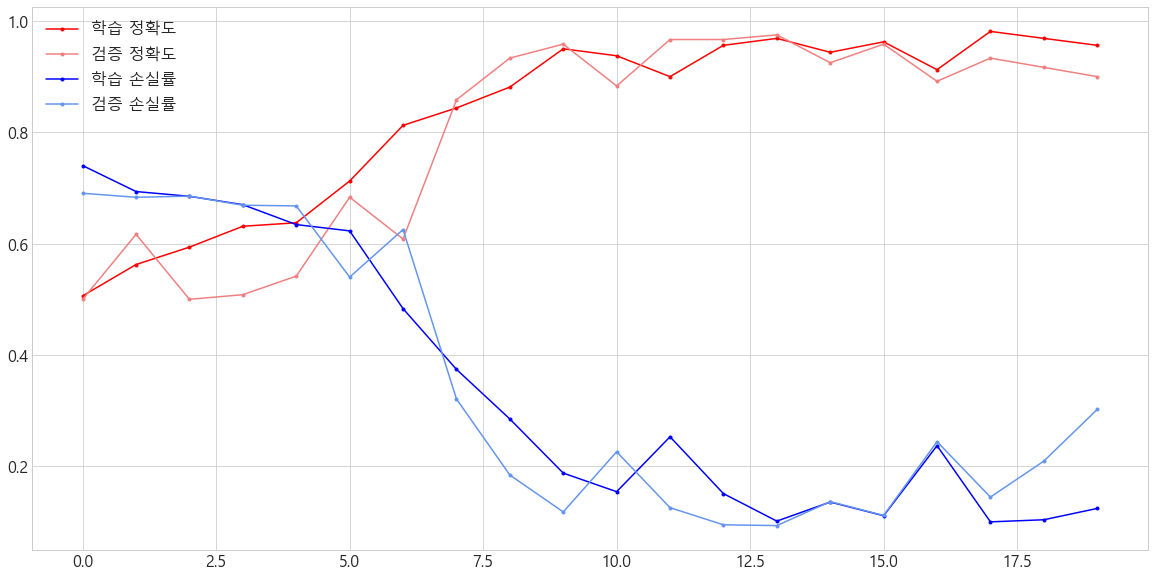

In [10]:
# 결과를 그래프로 표현한다.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

y_loss = history.history['loss']
y_vloss = history.history['val_loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='red', label='학습 정확도')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', label='검증 정확도')
plt.plot(x_len, y_loss, marker='.', c='blue', label='학습 손실률')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', label='검증 손실률')

plt.legend()
plt.show()